In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples # 评估指标：轮廓系数
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#### 数据范围：2021/01/01-2022/07/31在RG成功付款的用户
#### 数据量：217362
#### 实际用到数据量：217357(剔除5个离群点)

In [3]:
r1=open('RFM_data/RFM_k-means取数_580_1.csv')
r2=open('RFM_data/RFM_k-means取数_580_2.csv')
r3=open('RFM_data/RFM_k-means取数_580_3.csv')
rfm1=pd.read_csv(r1)
rfm2=pd.read_csv(r2)
rfm3=pd.read_csv(r3)
rfm=pd.concat((rfm1,rfm2,rfm3), axis=0)

In [4]:
rfm.head(20)

,user_id,Recency,Frequency,Monetary
0,19542306,42,205,16949.78
1,20172770,2,95,10588.64
2,20489490,4,84,8347.63
3,21839121,54,60,7101.84
4,9439233,3,53,6823.25
5,16729361,22,41,6343.50
6,20835215,29,39,5479.94
7,21106315,89,17,4943.48
8,10402254,1,54,4920.59
9,13108349,6,25,4579.56


In [5]:
#可以看到阈值取分位数和均值的差异程度
rfm.describe() #各字段统计信息

,user_id,Recency,Frequency,Monetary
count,2.173620e+05,217362.000000,217362.000000,217362.000000
mean,1.893373e+07,302.107411,1.512831,119.322552
std,4.909462e+06,177.968113,1.541331,153.869731
min,4.765000e+03,0.000000,1.000000,7.780000
25%,1.837178e+07,118.000000,1.000000,53.770000
50%,2.156617e+07,333.000000,1.000000,75.960000
75%,2.190818e+07,463.000000,2.000000,133.570000
max,2.223546e+07,576.000000,205.000000,16949.780000


C:\Users\Administrator.sf-202111191756\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Administrator.sf-202111191756\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Administrator.sf-202111191756\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


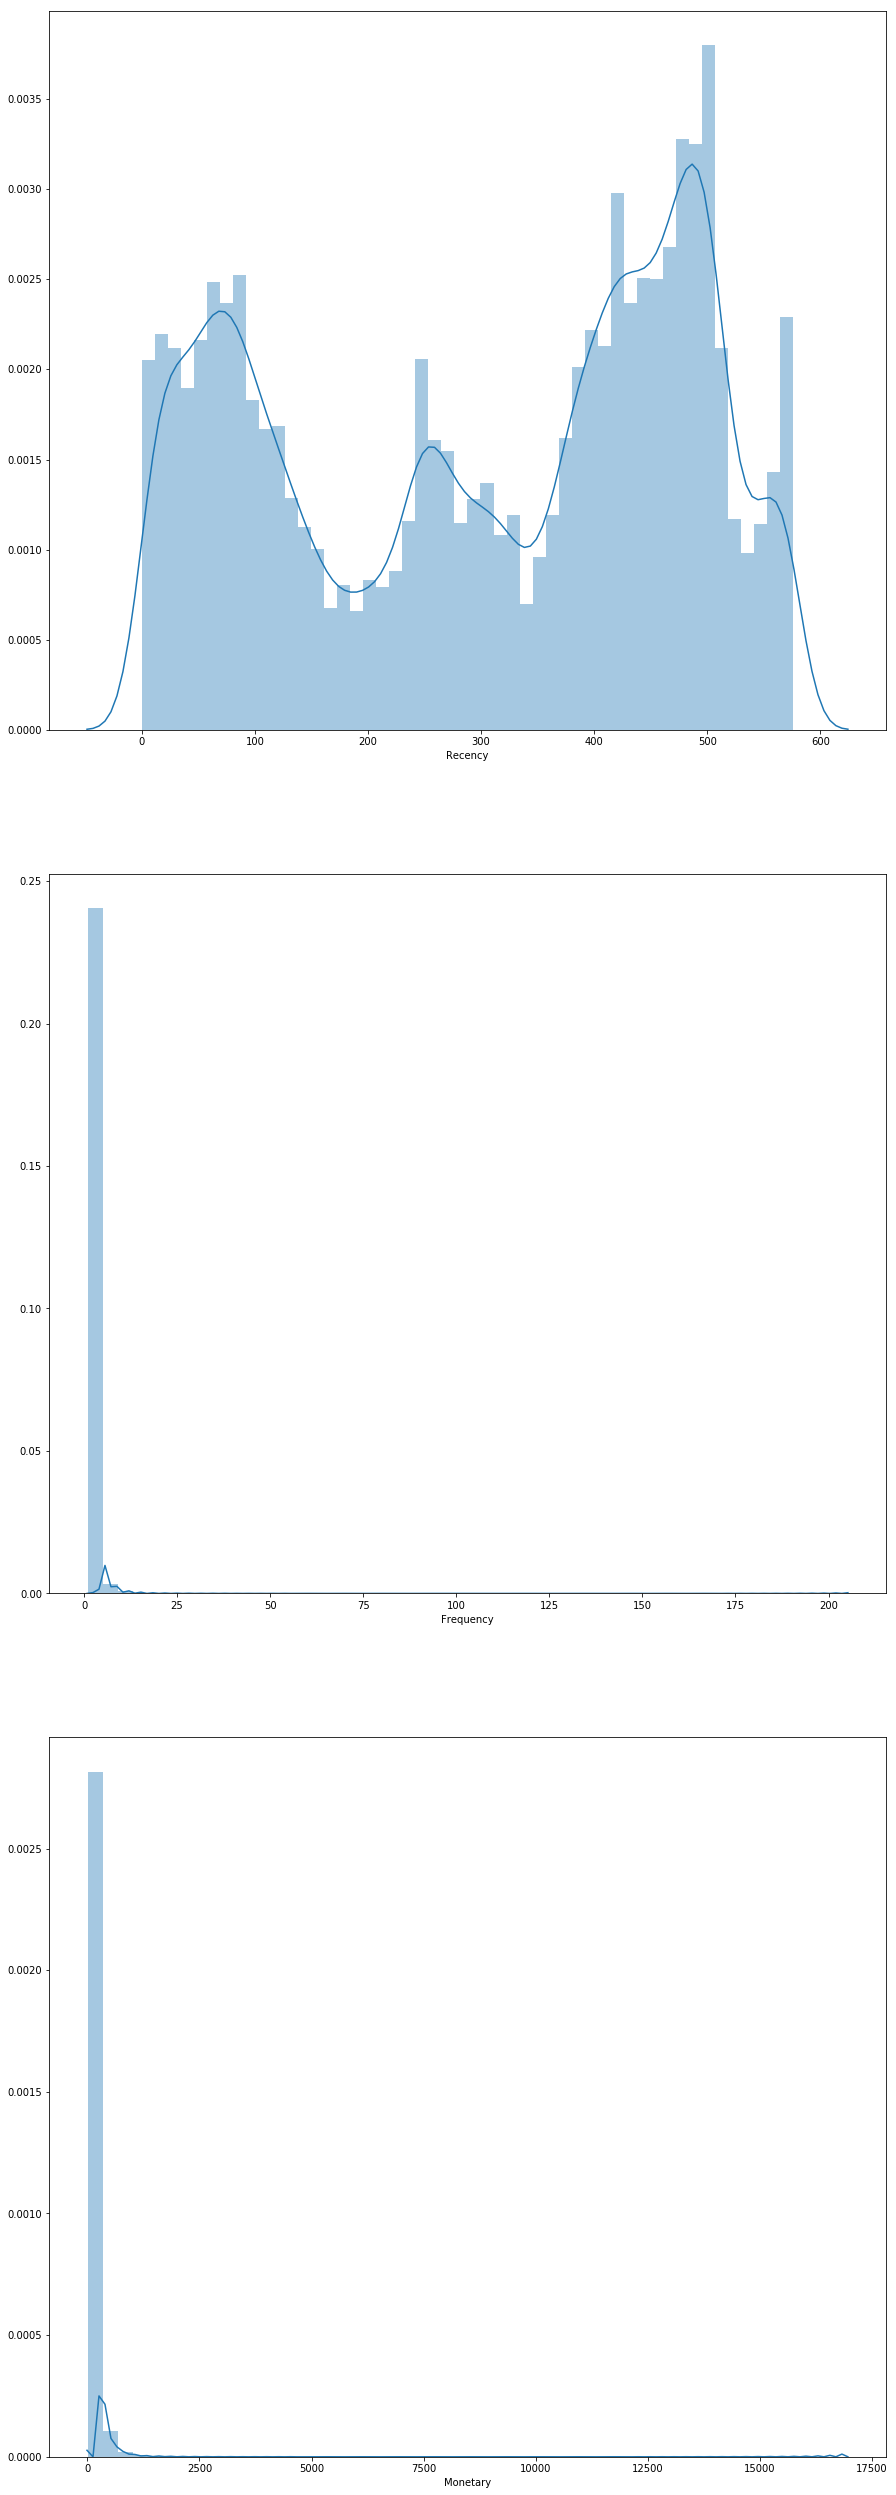

In [6]:
#各变量直方分布图
fig, ax=plt.subplots(3,1)
fig.set_size_inches(15,45)
sns.distplot(rfm['Recency'], ax=ax[0])
sns.distplot(rfm['Frequency'], ax=ax[1])
sns.distplot(rfm['Monetary'], ax=ax[2])

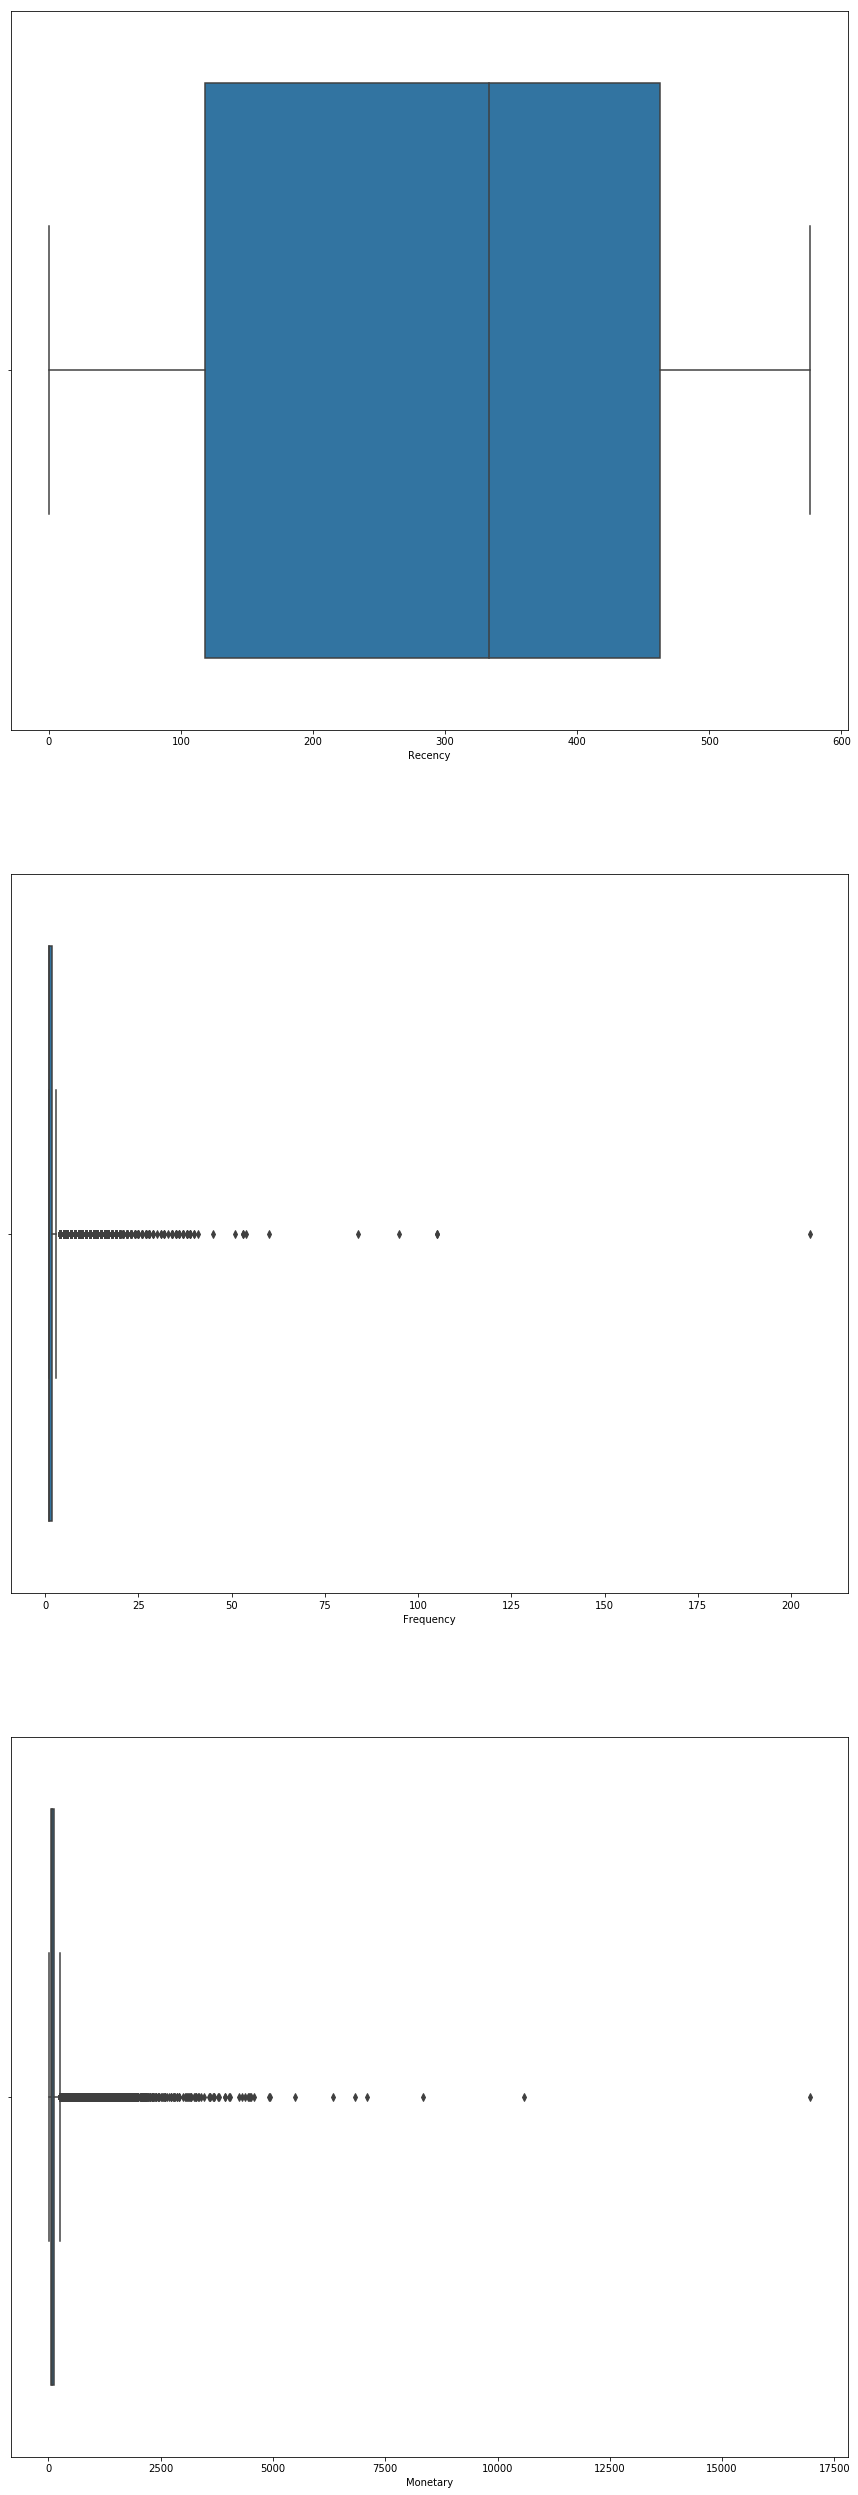

In [7]:
# 各变量箱线图 查看离群点
fig, ax=plt.subplots(3,1)
fig.set_size_inches(15,45)
sns.boxplot(rfm['Recency'], ax=ax[0])
sns.boxplot(rfm['Frequency'], ax=ax[1])
sns.boxplot(rfm['Monetary'], ax=ax[2])

In [8]:
# drop掉一些离群点
# rfm.drop(index=rfm[rfm['Monetary']>6000].index[0], axis=0, inplace=True)
# rfm.drop(index=rfm[rfm['Frequency']>80].index[0], axis=0, inplace=True)
rfm=rfm[rfm['Monetary']<=8000]
rfm=rfm[rfm['Frequency']<=80]

In [9]:
# 剔除离群点后
rfm.head(20)

,user_id,Recency,Frequency,Monetary
3,21839121,54,60,7101.84
4,9439233,3,53,6823.25
5,16729361,22,41,6343.50
6,20835215,29,39,5479.94
7,21106315,89,17,4943.48
8,10402254,1,54,4920.59
9,13108349,6,25,4579.56
11,21966276,7,18,4497.85
12,20583030,3,39,4468.95
14,17885147,84,37,4370.50


In [10]:
# 剔除离群点后 剩下114847个数
#可以看到阈值取分位数和均值的差异程度
rfm.describe() #各字段统计信息

,user_id,Recency,Frequency,Monetary
count,2.173570e+05,217357.000000,217357.000000,217357.000000
mean,1.893375e+07,302.113656,1.510133,119.118918
std,4.909456e+06,177.965302,1.419573,146.225671
min,4.765000e+03,0.000000,1.000000,7.780000
25%,1.837172e+07,118.000000,1.000000,53.770000
50%,2.156618e+07,333.000000,1.000000,75.950000
75%,2.190820e+07,463.000000,2.000000,133.570000
max,2.223546e+07,576.000000,60.000000,7101.840000


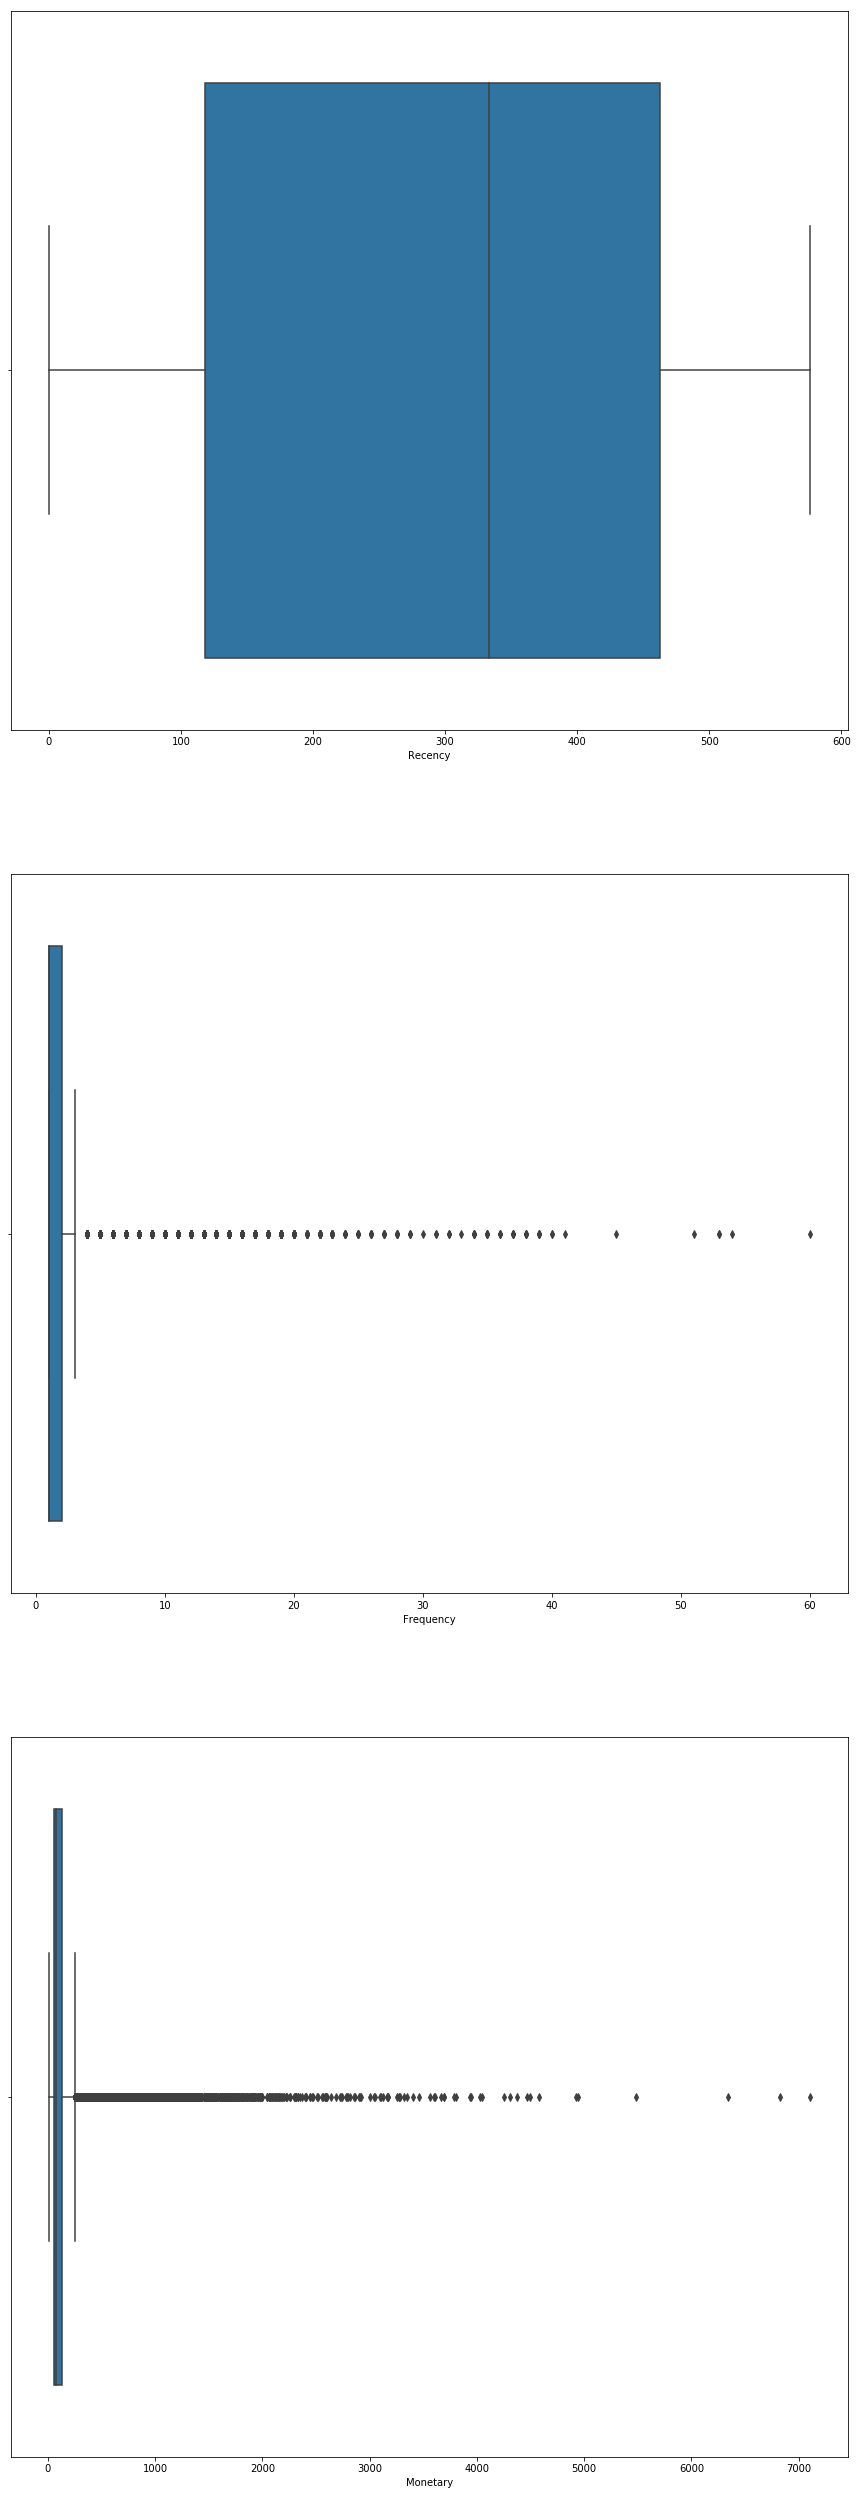

In [11]:
# 剔除离群点后
# 各变量箱线图 
fig, ax=plt.subplots(3,1)
fig.set_size_inches(15,45)
sns.boxplot(rfm['Recency'], ax=ax[0])
sns.boxplot(rfm['Frequency'], ax=ax[1])
sns.boxplot(rfm['Monetary'], ax=ax[2])

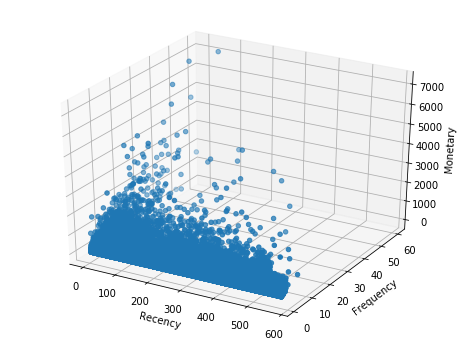

In [12]:
# 初始数据
# %matplotlib notebook  #可旋转，放大缩小。但数据量较大有延迟
# 静态图
%matplotlib inline 

fig=plt.figure()
fig.set_size_inches(8,6)
ax=fig.gca(projection='3d')
ax.scatter(rfm['Recency'],rfm['Frequency'],rfm['Monetary'])
ax.set_xlabel('Recency') # 画出坐标轴
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

In [13]:
# 数据标准化/归一化
# StandardScaler和MinMaxScaler：前者适用于正态分布的数据，后者适用于分布范围较稳定的数据，当新数据的加入导致max/min变化，则需重新定义；前者对outlier些许敏感，后者对outlier非常敏感

scaler=StandardScaler()
rfm_scale=scaler.fit_transform(rfm.loc[:, 'Recency':'Monetary']) #fit找出rfm的均值和标准差，transform将标准化规则运用在rfm上

rfm_scale=pd.DataFrame(rfm_scale, columns=['Recency','Frequency','Monetary'], index=rfm.index)
rfm_scale.head()

,Recency,Frequency,Monetary
3,-1.394172,41.202539,47.753155
4,-1.680745,36.271467,45.847945
5,-1.573983,27.818200,42.567050
6,-1.534649,26.409322,36.661370
7,-1.197504,10.911665,32.992649


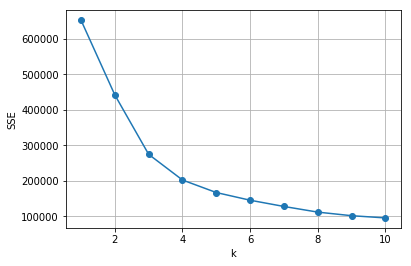

In [14]:
# 手肘法
# k值的选取，确定分为几类
SSE = [] # 存放每次结果的误差平方和
fig=plt.figure()
for k in range(1,11): 
    estimator = KMeans(n_clusters=k, random_state=360) # 构造聚类器 
    estimator.fit(rfm_scale) 
    SSE.append(estimator.inertia_)
X = range(1,11)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.grid()
plt.show()

# 图示可以看出，离群点的剔除有助于进一步缩小SSE

## k=5

In [15]:
kmodel5=KMeans(n_clusters=5, random_state=360) #k=5,分为k类。设置随机种子固定每次聚类的结果
kmodel5.fit(rfm_scale) #训练模型

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=360, tol=0.0001, verbose=0)

In [16]:
# 实际迭代次数
print(kmodel5.n_iter_)

21


In [17]:
# 查看聚类中心
center_580_5=pd.DataFrame(kmodel5.cluster_centers_, columns=['Recency','Frequency','Monetary'])
print(center_580_5)

    Recency  Frequency   Monetary
0  0.818277  -0.247357  -0.210598
1 -1.011192  -0.216921  -0.254156
2 -0.723400   4.432127   4.281499
3 -0.351654   1.306337   1.280384
4 -1.053252  14.073574  13.834572


In [18]:
#统计各个类别的数目
r2 = pd.Series(kmodel5.labels_).value_counts() 
print(r2)

0    112339
1     81151
3     20144
2      3462
4       261
dtype: int64


In [19]:
# 获取每个样本所属的簇/类别
r3 = pd.DataFrame(kmodel5.labels_, columns=['label'], index=rfm.index)
print(r3)

       label
3          4
4          4
5          4
6          4
7          4
8          4
9          4
11         4
12         4
14         4
15         4
16         4
17         4
18         4
19         4
20         4
21         4
22         4
23         4
24         4
25         4
26         4
27         4
28         4
29         4
30         4
31         4
32         4
33         4
34         4
...      ...
17336      1
17337      1
17338      1
17339      1
17340      1
17341      1
17342      1
17343      1
17344      1
17345      1
17346      1
17347      1
17348      1
17349      1
17350      1
17351      1
17352      1
17353      1
17354      1
17355      1
17356      0
17357      1
17358      1
17359      1
17360      1
17361      1
17362      1
17363      1
17364      1
17365      1

[217357 rows x 1 columns]


In [20]:
# 得到打好标签的用户数据，可输出csv
rfm_label5 = pd.concat([rfm, r3], axis=1)
rfm_label5.head(200)

,user_id,Recency,Frequency,Monetary,label
3,21839121,54,60,7101.84,4
4,9439233,3,53,6823.25,4
5,16729361,22,41,6343.50,4
6,20835215,29,39,5479.94,4
7,21106315,89,17,4943.48,4
8,10402254,1,54,4920.59,4
9,13108349,6,25,4579.56,4
11,21966276,7,18,4497.85,4
12,20583030,3,39,4468.95,4
14,17885147,84,37,4370.50,4


<IPython.core.display.Javascript object>


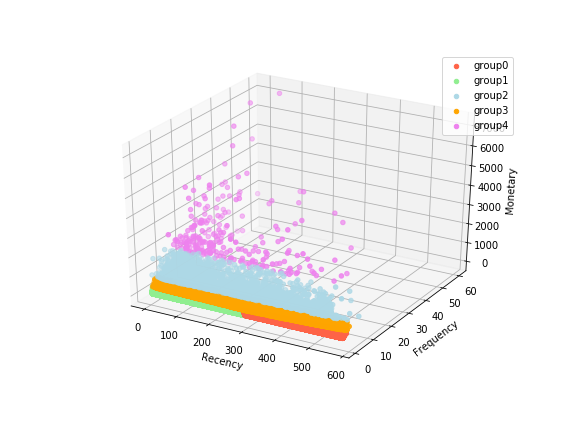

In [22]:
# 群体分层后的三维散点图,可旋转，数据量较大有延迟
%matplotlib notebook

fig=plt.figure()
fig.set_size_inches(8,6)
ax=fig.gca(projection='3d')
color=['tomato','lightgreen','lightblue','orange','violet']
for i in range(5):
    d = rfm_label5[rfm_label5.label==i]
    ax.scatter(d['Recency'],d['Frequency'],d['Monetary'],color=color[i],label=f"group{i}")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.legend()

### 聚类中心点还原

In [23]:
ms580=rfm.describe()[1:3].drop(['user_id'], axis=1)
ms580

,Recency,Frequency,Monetary
mean,302.113656,1.510133,119.118918
std,177.965302,1.419573,146.225671


In [24]:
center_580_5

,Recency,Frequency,Monetary
0,0.818277,-0.247357,-0.210598
1,-1.011192,-0.216921,-0.254156
2,-0.723400,4.432127,4.281499
3,-0.351654,1.306337,1.280384
4,-1.053252,14.073574,13.834572


In [25]:
a=pd.DataFrame()

for i in range(3):
    a[i]=center_580_5.iloc[:,i].values*ms580.iloc[1,i]+ms580.iloc[0,i]

center_580_5_reverse=pd.DataFrame(a, index=center_580_5.index)
center_580_5_reverse.columns=['R','F','M']
center_580_5_reverse

,R,F,M
0,447.738620,1.158992,88.324104
1,122.156565,1.202198,81.954773
2,173.373514,7.801860,745.184042
3,239.531407,3.364574,306.343923
4,114.671325,21.488596,2142.088547


In [26]:
kmodel5.lablecount=pd.DataFrame(pd.Series(kmodel5.labels_).value_counts() , columns=['count'])
kmodel5.lablecount

,count
0,112339
1,81151
3,20144
2,3462
4,261


In [27]:
# 各簇中心点、数量
center_580_5_count=pd.concat((center_580_5_reverse,kmodel5.lablecount), axis=1)
center_580_5_count.sort_values(by='count', inplace=True)
center_580_5_count=center_580_5_count.round({'R':2,'F':2,'M':2})
center_580_5_count

,R,F,M,count
4,114.67,21.49,2142.09,261
2,173.37,7.80,745.18,3462
3,239.53,3.36,306.34,20144
1,122.16,1.20,81.95,81151
0,447.74,1.16,88.32,112339


In [127]:
center_360_5_count.to_csv('RFM_data/center_360_5_count')

In [126]:
rfm_label5.to_csv('RFM_data/rfm_label5')